# Simple linear regression

In [1]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
palette = 'muted'
sns.set_palette(palette); sns.set_color_codes(palette)
np.set_printoptions(precision=2)
pd.set_option('display.precision', 2)

In [2]:
sns.set()

## 1. 构造数据集

In [3]:
np.random.seed(1)
N = 100
alfa_real = 2.5
beta_real = 0.9
eps_real = np.random.normal(0, 0.5, size=N)

x = np.random.normal(10, 1, N)
y_real = alfa_real + beta_real * x 
y = y_real + eps_real

In [4]:
x

array([ 9.55, 11.22, 10.4 , 10.59,  8.91, 10.17, 10.74,  9.05,  9.73,
       10.03,  8.63, 10.32, 10.85,  9.14, 10.35,  8.69,  9.96,  8.38,
       11.12, 10.41,  9.98,  9.22, 11.27, 11.97,  8.14, 11.24, 11.63,
       10.34,  8.8 , 10.86,  9.82,  9.4 ,  8.77, 10.55, 10.79,  9.38,
       10.52,  8.86, 10.8 , 10.05,  9.81,  9.9 , 10.87, 10.75, 10.53,
       10.14, 10.08, 10.62, 10.23, 10.68,  9.69,  7.57, 11.04, 12.19,
       10.44,  9.9 ,  9.86,  9.88, 10.02,  8.88,  9.48,  9.  , 10.25,
        9.7 , 10.5 ,  9.83, 10.99, 10.21, 12.19,  8.1 ,  9.35, 10.9 ,
       12.53,  9.75, 10.04,  9.77, 11.33,  9.71, 10.68,  9.68,  8.73,
       10.31, 10.5 , 11.29,  9.89,  9.38, 10.56, 10.24, 10.28,  9.93,
       11.16, 10.37, 11.9 , 11.11, 10.66,  8.37, 10.6 , 10.42, 10.81,
       11.04])

In [5]:
y

array([11.91, 12.3 , 11.6 , 11.5 , 10.95, 10.5 , 13.04, 10.26, 11.42,
       11.4 , 11.  , 10.75, 12.1 , 10.53, 12.38,  9.77, 11.38,  9.61,
       12.53, 12.16, 10.93, 11.37, 13.1 , 13.52, 10.28, 12.27, 12.9 ,
       11.34, 10.29, 12.54, 10.99, 10.76, 10.05, 11.57, 11.88, 10.93,
       11.41, 10.59, 13.05, 11.91, 11.24, 10.96, 11.91, 13.02, 12.  ,
       11.31, 11.67, 13.11, 11.77, 12.42, 11.37,  9.13, 11.86, 13.29,
       11.79, 11.7 , 11.8 , 11.86, 11.66, 10.93, 10.66, 11.23, 11.98,
       11.08, 12.19, 11.3 , 12.95, 12.45, 14.56,  9.1 , 10.2 , 12.06,
       13.86, 11.71, 11.7 , 10.29, 12.55, 11.66, 12.23, 11.59, 10.24,
       11.68, 12.05, 12.87, 11.5 , 11.  , 11.67, 11.91, 11.81, 12.  ,
       13.14, 11.93, 13.03, 12.18, 12.3 , 10.07, 11.87, 11.9 , 11.92,
       12.79])

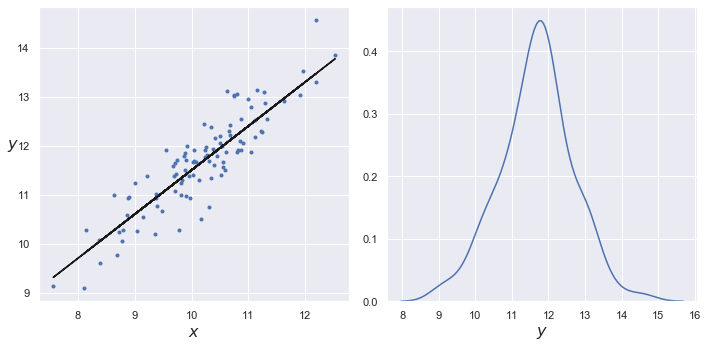

In [6]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(x, y, 'b.')
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16, rotation=0)
plt.plot(x, y_real, 'k')
plt.subplot(1,2,2)
sns.kdeplot(y)
plt.xlabel('$y$', fontsize=16)
plt.tight_layout()
plt.savefig('B04958_04_02.png', dpi=300, figsize=(5.5, 5.5))

## 2. 建立模型

In [20]:
with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=1)
    epsilon = pm.HalfCauchy('epsilon', 5)

    mu = pm.Deterministic('mu', alpha + beta * x)
    y_pred = pm.Normal('y_pred', mu=mu, sd=epsilon, observed=y)
    
    start = pm.find_MAP() 
    step = pm.Metropolis() 
    trace = pm.sample(10000, step, start, nchains=1)

d:\application\anaconda3\envs\pymc3\lib\site-packages\pymc3\tuning\starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -66.676, ||grad|| = 48.412: 100%|█████████████████████████████████████████████| 38/38 [00:00<00:00, 1909.52it/s]
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [epsilon]
>Metropolis: [beta]
>Metropolis: [alpha]
100%|██████████████████████████████████████████████████████████████████████████| 10500/10500 [00:03<00:00, 2935.07it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


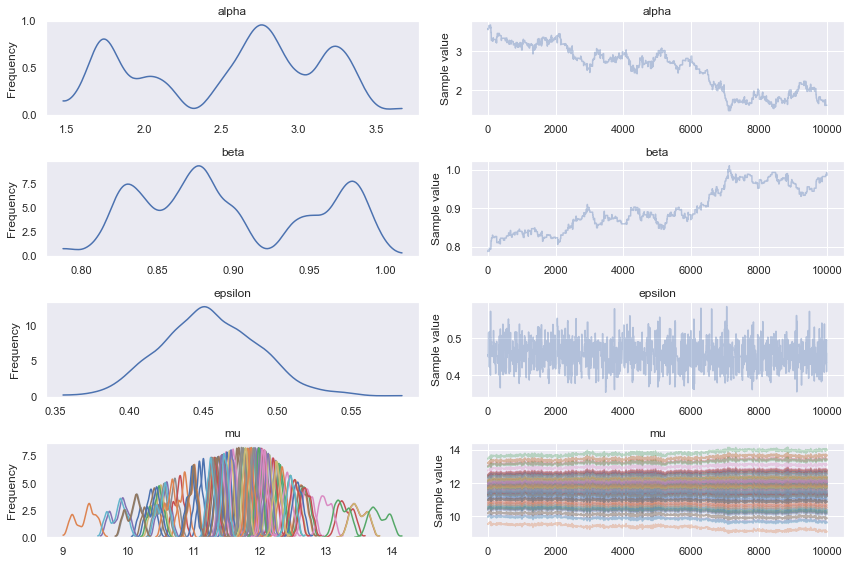

In [21]:
pm.traceplot(trace)
plt.savefig('B04958_04_03.png', dpi=300, figsize=(5.5, 5.5))

In [22]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
alpha,2.55,0.58,5.73e-02,1.59,3.36
beta,0.90,0.06,5.62e-03,0.82,0.99
epsilon,0.46,0.03,1.07e-03,0.39,0.52
mu__0,11.13,0.06,4.02e-03,11.01,11.23
mu__1,12.63,0.08,5.95e-03,12.50,12.77
...,...,...,...,...,...
mu__95,10.07,0.11,1.04e-02,9.87,10.25
mu__96,12.07,0.05,2.77e-03,11.98,12.18
mu__97,11.91,0.05,2.03e-03,11.82,12.00
mu__98,12.26,0.06,3.77e-03,12.16,12.38


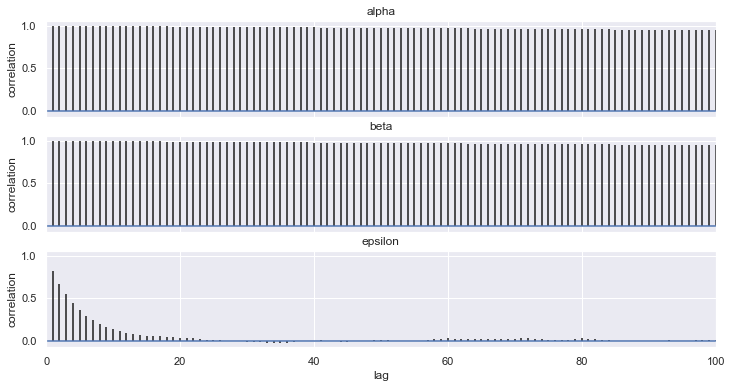

In [23]:
varnames = ['alpha', 'beta', 'epsilon']
pm.autocorrplot(trace, varnames)
plt.savefig('B04958_04_04.png', dpi=300, figsize=(5.5, 5.5));

## 3. 解决高自相关性

### 3.1 Modyfing the data before running the models

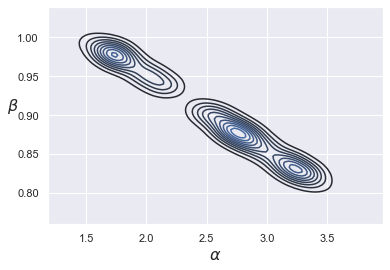

In [24]:
sns.kdeplot(trace['alpha'], trace['beta'])
plt.xlabel(r'$\alpha$', fontsize=16)
plt.ylabel(r'$\beta$', fontsize=16, rotation=0)
plt.savefig('B04958_04_05.png', dpi=300, figsize=(5.5, 5.5));

### 3.2 Changing the sampling method

In [25]:
with pm.Model() as model_n:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=1)
    epsilon = pm.HalfCauchy('epsilon', 5)
    
    mu = pm.Deterministic('mu', alpha + beta * x)

    y_pred = pm.Normal('y_pred', mu=mu, sd=epsilon, observed=y)
    
    start = pm.find_MAP() 
    step = pm.NUTS() 
    trace_n = pm.sample(2000, step=step, start=start, nchains=1)

logp = -66.676, ||grad|| = 48.412: 100%|██████████████████████████████████████████████| 38/38 [00:00<00:00, 635.25it/s]
Sequential sampling (1 chains in 1 job)
NUTS: [epsilon, beta, alpha]
100%|██████████████████████████████████████████████████████████████████████████████| 2500/2500 [00:29<00:00, 83.86it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


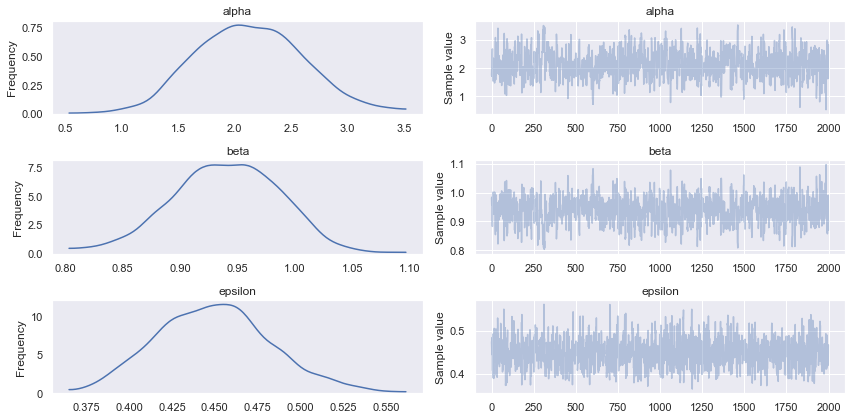

In [28]:
pm.traceplot(trace_n, varnames);
plt.savefig('B04958_04_16.png', dpi=300, figsize=(5.5, 5.5));

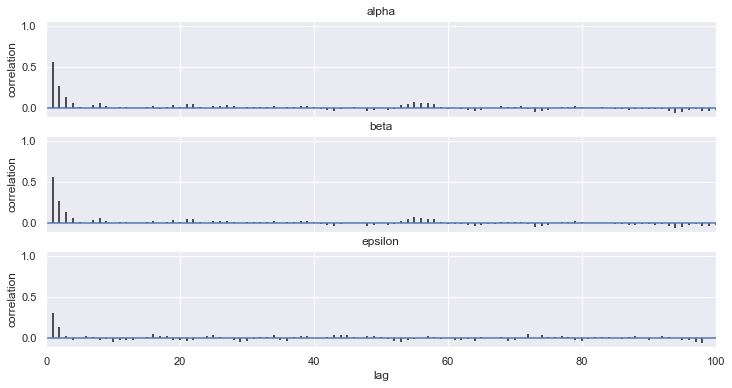

In [29]:
pm.autocorrplot(trace_n, varnames)
plt.savefig('B04958_04_17.png', dpi=300, figsize=(5.5, 5.5));

In [31]:
pm.summary(trace_n, varnames)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
alpha,2.13,0.48,1.81e-02,1.29,3.13
beta,0.94,0.05,1.78e-03,0.84,1.02
epsilon,0.45,0.03,1.05e-03,0.39,0.52


## 4. 对后验进行解释与可视化

### Posterior predictive checks

In [32]:
ppc = pm.sample_ppc(trace_n, samples=231, model=model_n)

d:\application\anaconda3\envs\pymc3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: sample_ppc() is deprecated.  Please use sample_posterior_predictive()
  """Entry point for launching an IPython kernel.
100%|███████████████████████████████████████████████████████████████████████████████| 231/231 [00:00<00:00, 813.39it/s]


d:\application\anaconda3\envs\pymc3\lib\site-packages\seaborn\distributions.py:323: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  ax.plot(x, y, color=color, label=label, **kwargs)


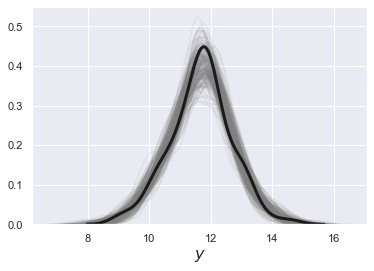

In [33]:
# predicted data
for y_tilde in ppc['y_pred']:
    sns.kdeplot(y_tilde, alpha=0.1, c='gray')
# actual data
sns.kdeplot(y, linewidth=3, color='k')
plt.xlabel('$y$', fontsize=16);

### interpreting the posterior

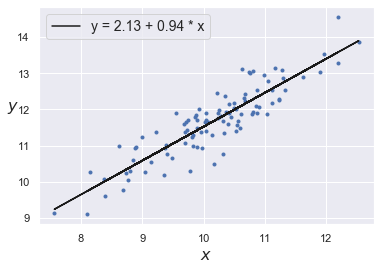

In [34]:
plt.plot(x, y, 'b.');
alpha_m = trace_n['alpha'].mean()
beta_m = trace_n['beta'].mean()
plt.plot(x, alpha_m + beta_m * x, c='k', label='y = {:.2f} + {:.2f} * x'.format(alpha_m, beta_m))
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16, rotation=0)
plt.legend(loc=2, fontsize=14)
plt.savefig('B04958_04_06.png', dpi=300, figsize=(5.5, 5.5));

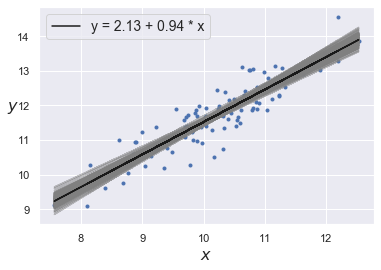

In [35]:
plt.plot(x, y, 'b.');

idx = range(0, len(trace_n['alpha']), 10)
plt.plot(x, trace_n['alpha'][idx] + trace_n['beta'][idx] *  x[:,np.newaxis], c='gray', alpha=0.5);

plt.plot(x, alpha_m + beta_m * x, c='k', label='y = {:.2f} + {:.2f} * x'.format(alpha_m, beta_m))

plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16, rotation=0)
plt.legend(loc=2, fontsize=14)
plt.savefig('B04958_04_07.png', dpi=300, figsize=(5.5, 5.5));

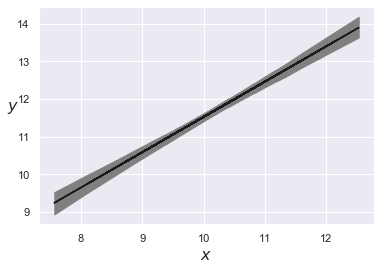

In [36]:
plt.plot(x, alpha_m + beta_m * x, c='k', label='y = {:.2f} + {:.2f} * x'.format(alpha_m, beta_m))

idx = np.argsort(x)
x_ord = x[idx]
sig = pm.hpd(trace_n['mu'], alpha=.02)[idx]
plt.fill_between(x_ord, sig[:,0], sig[:,1], color='gray')

plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16, rotation=0)
plt.savefig('B04958_04_08.png', dpi=300, figsize=(5.5, 5.5));

In [37]:
ppc = pm.sample_ppc(trace_n, samples=1000, model=model_n)

d:\application\anaconda3\envs\pymc3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: sample_ppc() is deprecated.  Please use sample_posterior_predictive()
  """Entry point for launching an IPython kernel.
100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 664.69it/s]


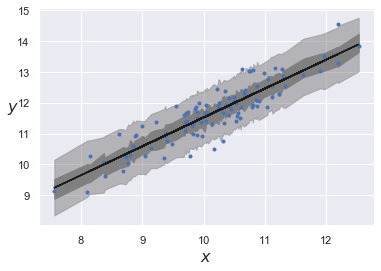

In [38]:
plt.plot(x, y, 'b.')
plt.plot(x, alpha_m + beta_m * x, c='k', label='y = {:.2f} + {:.2f} * x'.format(alpha_m, beta_m))

sig0 = pm.hpd(ppc['y_pred'], alpha=0.5)[idx]
sig1 = pm.hpd(ppc['y_pred'], alpha=0.05)[idx]
plt.fill_between(x_ord, sig0[:,0], sig0[:,1], color='gray', alpha=1)
plt.fill_between(x_ord, sig1[:,0], sig1[:,1], color='gray', alpha=0.5)

plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16, rotation=0)
plt.savefig('B04958_04_09.png', dpi=300, figsize=(5.5, 5.5));

## 5. Pearson correlation coefficient

In [42]:
with pm.Model() as model_n:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=1)
    epsilon = pm.HalfCauchy('epsilon', 5)
    
    mu = alpha + beta * x
    y_pred = pm.Normal('y_pred', mu=mu, sd=epsilon, observed=y)

    rb = pm.Deterministic('rb', (beta * x.std() / y.std()) ** 2)

    y_mean = y.mean()
    ss_reg = pm.math.sum((mu - y_mean) ** 2)
    ss_tot = pm.math.sum((y - y_mean) ** 2)
    rss = pm.Deterministic('rss', ss_reg/ss_tot)

    start = pm.find_MAP()
    step = pm.NUTS()
    trace_n = pm.sample(2000, step=step, start=start, nchains=1)

d:\application\anaconda3\envs\pymc3\lib\site-packages\pymc3\tuning\starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -66.676, ||grad|| = 48.412: 100%|██████████████████████████████████████████████| 38/38 [00:00<00:00, 635.02it/s]
Sequential sampling (1 chains in 1 job)
NUTS: [epsilon, beta, alpha]
100%|██████████████████████████████████████████████████████████████████████████████| 2500/2500 [00:34<00:00, 71.55it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


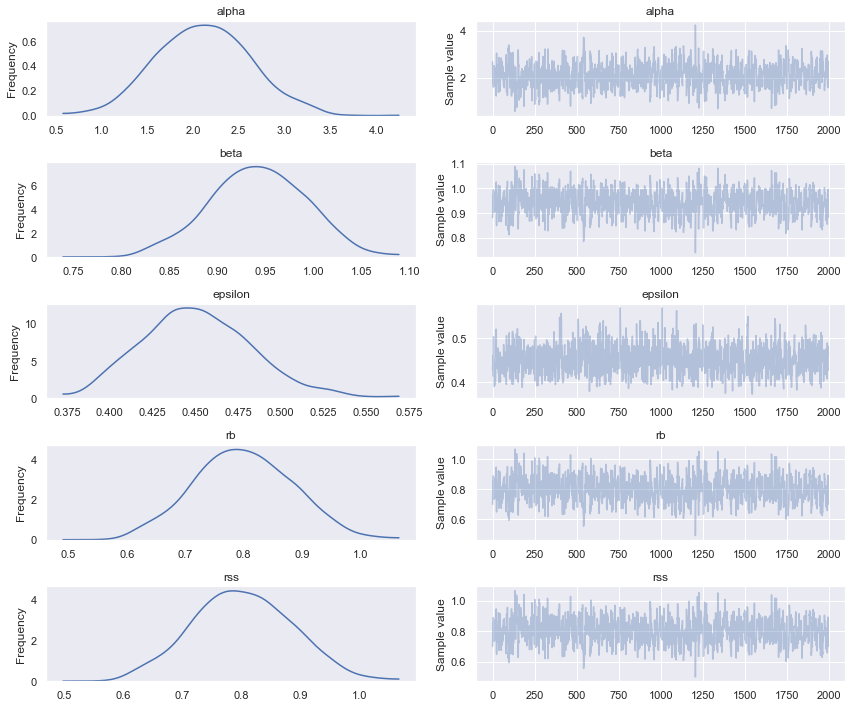

In [43]:
pm.traceplot(trace_n)
plt.savefig('B04958_04_10.png', dpi=300, figsize=(5.5, 5.5));

In [44]:
pm.summary(trace_n)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
alpha,2.11,0.51,1.94e-02,1.20,3.16
beta,0.94,0.05,1.91e-03,0.84,1.03
epsilon,0.45,0.03,1.01e-03,0.39,0.51
rb,0.80,0.08,3.21e-03,0.63,0.95
rss,0.80,0.08,3.23e-03,0.63,0.96


### The multivariate normal distribution 
Actualy the bivariate

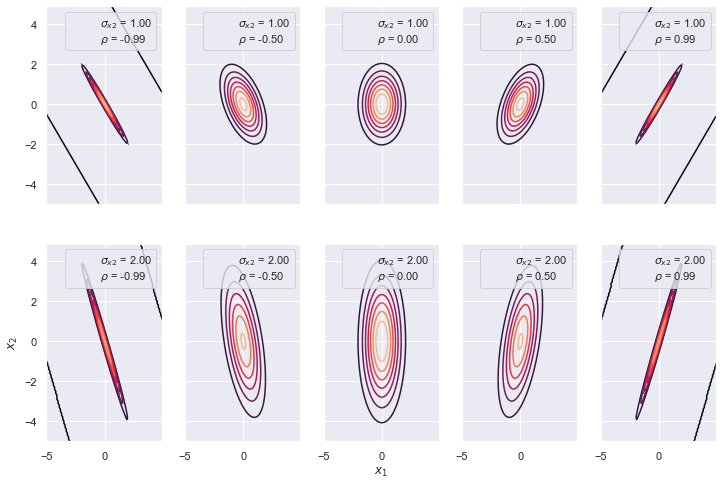

In [59]:
sigma_x1 = 1
sigmas_x2 = [1, 2]
rhos = [-0.99, -0.5, 0, 0.5, 0.99]

k, l = np.mgrid[-5:5:.1, -5:5:.1]
pos = np.empty(k.shape + (2,))
pos[:, :, 0] = k; pos[:, :, 1] = l

f, ax = plt.subplots(len(sigmas_x2), len(rhos), sharex=True, sharey=True, figsize=(12, 8))
# f.figure(figsize=(5, 1))
for i in range(2):
    for j in range(5):
        sigma_x2 = sigmas_x2[i]
        rho = rhos[j]
        cov = [[sigma_x1**2, sigma_x1*sigma_x2*rho], [sigma_x1*sigma_x2*rho, sigma_x2**2]]
        rv = stats.multivariate_normal([0, 0], cov)
        ax[i,j].contour(k, l, rv.pdf(pos))
        ax[i,j].plot(0, 0, 
        label="$\\sigma_{{x2}}$ = {:3.2f}\n$\\rho$ = {:3.2f}".format(sigma_x2, rho),  alpha=0)
        ax[i,j].legend()
ax[1,2].set_xlabel('$x_1$')
ax[1,0].set_ylabel('$x_2$')
plt.savefig('B04958_04_11.png', dpi=300, figsize=(5.5, 5.5));

In [7]:
data = np.stack((x, y)).T

In [9]:
with pm.Model() as pearson_model:
    
    mu = pm.Normal('mu', mu=data.mean(0), sd=10, shape=2)
    
    sigma_1 = pm.HalfNormal('simga_1', 10)
    sigma_2 = pm.HalfNormal('sigma_2', 10)
    rho = pm.Uniform('rho', -1, 1)
    
    cov = pm.math.stack(([sigma_1**2, sigma_1*sigma_2*rho], [sigma_1*sigma_2*rho, sigma_2**2]))
    
    y_pred = pm.MvNormal('y_pred', mu=mu, cov=cov, observed=data)
    
    start = pm.find_MAP()
    step = pm.NUTS(scaling=start)
    trace_p = pm.sample(1000, step=step, start=start, chains=1)

d:\application\anaconda3\envs\pymc3\lib\site-packages\pymc3\tuning\starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
d:\application\anaconda3\envs\pymc3\lib\site-packages\theano\tensor\basic.py:6592: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
  0%|                                                                                         | 0/5000 [00:00<?, ?it/s]d:\application\anaconda3\envs\pymc3\lib\site-packages\theano\tensor\basic.py:6592: FutureW

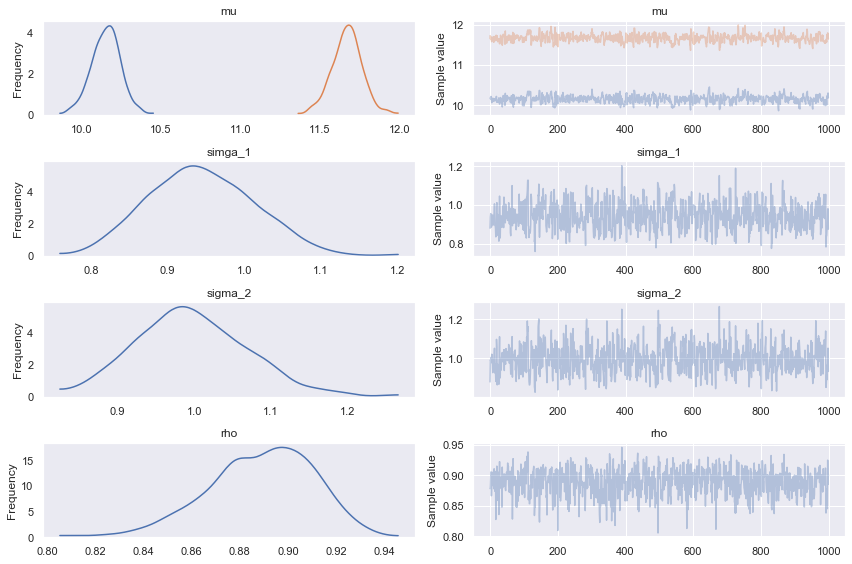

In [10]:
pm.traceplot(trace_p);
plt.savefig('B04958_04_12.png', dpi=300, figsize=(5.5, 5.5));